In [1]:
import matplotlib.pyplot as plt
from networkx.classes import neighbors
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sqlalchemy.dialects.mssql.information_schema import columns

In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [5]:
df.describe()


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [6]:
# Data Visualization and analysis

In [8]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

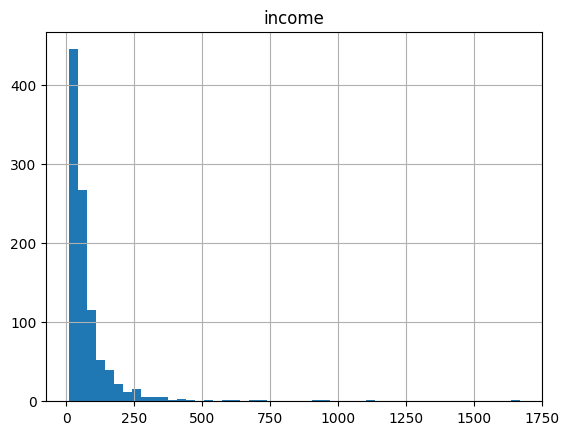

In [13]:
df.hist(column='income', bins=50)

In [14]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [16]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [17]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

In [18]:
# Normalie data

In [19]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [21]:
# Classification
# K nearest neighbor (KNN)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

In [24]:
# Predicting

In [26]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

In [27]:
print(yhat)

[1 1 3 2 4 3 3 2 2 4 1 4 2 1 3 1 3 4 3 4 3 3 3 1 1 3 1 1 1 2 1 1 4 4 3 2 3
 1 2 3 1 4 2 1 2 1 4 1 4 4 2 1 2 3 2 3 3 3 4 1 1 4 2 3 3 1 1 2 2 1 1 3 4 3
 2 1 4 2 2 3 3 1 2 4 4 2 3 4 1 1 2 2 1 1 1 1 2 2 3 1 1 4 1 1 1 4 2 2 2 2 1
 3 2 4 1 2 1 1 2 3 4 2 2 3 1 1 2 3 1 3 3 1 1 4 2 2 2 1 1 3 1 1 4 1 1 2 1 3
 2 2 1 2 2 3 2 3 3 3 3 2 3 1 1 1 3 4 1 1 3 1 3 3 1 2 2 2 1 1 1 1 1 1 1 2 3
 1 1 1 4 4 3 1 1 3 3 4 1 4 3 3]


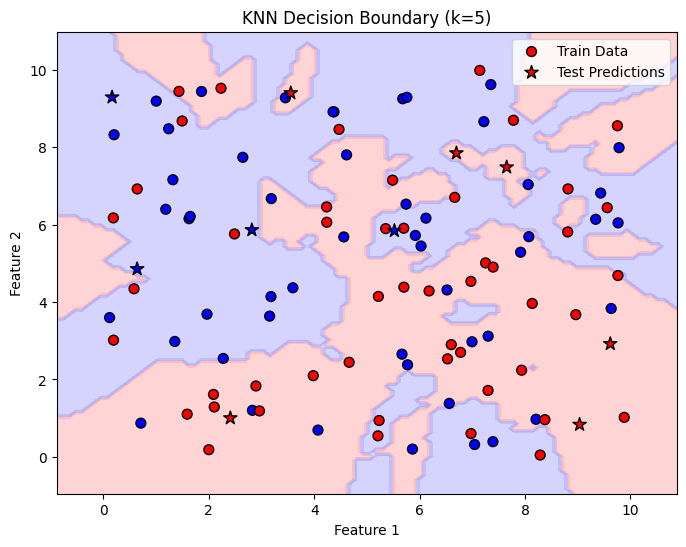

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

# Giả sử X_train, y_train, X_test, yhat đã có sẵn từ mô hình
# Tạo dữ liệu mẫu nếu chưa có
# Train KNN Model
k = 5
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train, y_train)
yhat = neigh.predict(X_test)

# Tạo lưới điểm để vẽ quyết định biên (Decision Boundary)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Vẽ Decision Boundary
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#0000FF']

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=ListedColormap(cmap_bold), s=50, label="Train Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=yhat, marker='*', s=100, edgecolor='k', cmap=ListedColormap(cmap_bold), label="Test Predictions")

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'KNN Decision Boundary (k={k})')
plt.legend()
plt.show()


In [30]:
# practice k = 6

In [32]:
k = 6
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
print(yhat[0:6])

[0 0 0 1 0 0]


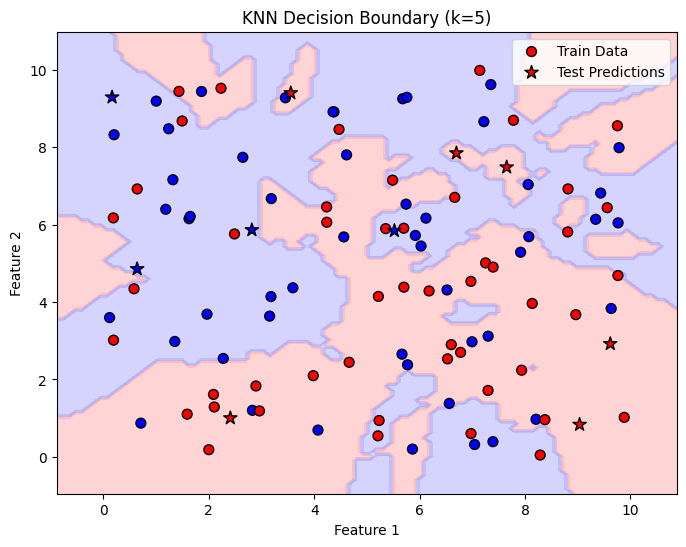

In [35]:


# Tạo lưới điểm để vẽ quyết định biên (Decision Boundary)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Vẽ Decision Boundary
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#0000FF']

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=ListedColormap(cmap_bold), s=50, label="Train Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=yhat, marker='*', s=100, edgecolor='k', cmap=ListedColormap(cmap_bold), label="Test Predictions")

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'KNN Decision Boundary (k={k})')
plt.legend()
plt.show()